In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#from scipy.stats import norm, lognorm, ttest_ind
#from scipy.optimize import curve_fit

In [2]:
kelly = ["#ebce2b", "#702c8c", "#db6917", "#96cde6", "#ba1c30", "#c0bd7f", "#7f7e80", "#5fa641", "#d485b2", "#4277b6", "#df8461", "#463397", "#e1a11a", "#91218c", "#e8e948", "#7e1510", "#92ae31", "#6f340d", "#d32b1e", "#2b3514",]

# Reading the csv file of benchmark run

In [3]:
df = pd.read_csv('03-metrics.csv')

In [4]:
df.columns

Index(['Force Field', 'SMILES', 'Conformer Idx', 'RMSD', 'Bond RMSD',
       'Angle RMSD', 'Dihedral RMSD', 'Improper RMSD', 'TFD', 'FB OBJECTIVE',
       'Record ID', 'ddE'],
      dtype='object')

In [5]:
# a is a list
def function_hist(a, ini, final, nbins):
    bins = np.linspace(ini, final, nbins)
    counts, bins = np.histogram(np.array(a), bins)
    return counts, bins

In [6]:
ff_list = list(df['Force Field'].unique())
ff_list

['openff-2.1.0', 'openff-2.0.0', 'espaloma-0.3.0-rc1', 'espaloma-0.3.0']

# Cumulative distributions of the metrics RMSD/TFD/ddE

In [7]:
from matplotlib.ticker import FormatStrFormatter, MultipleLocator, AutoMinorLocator

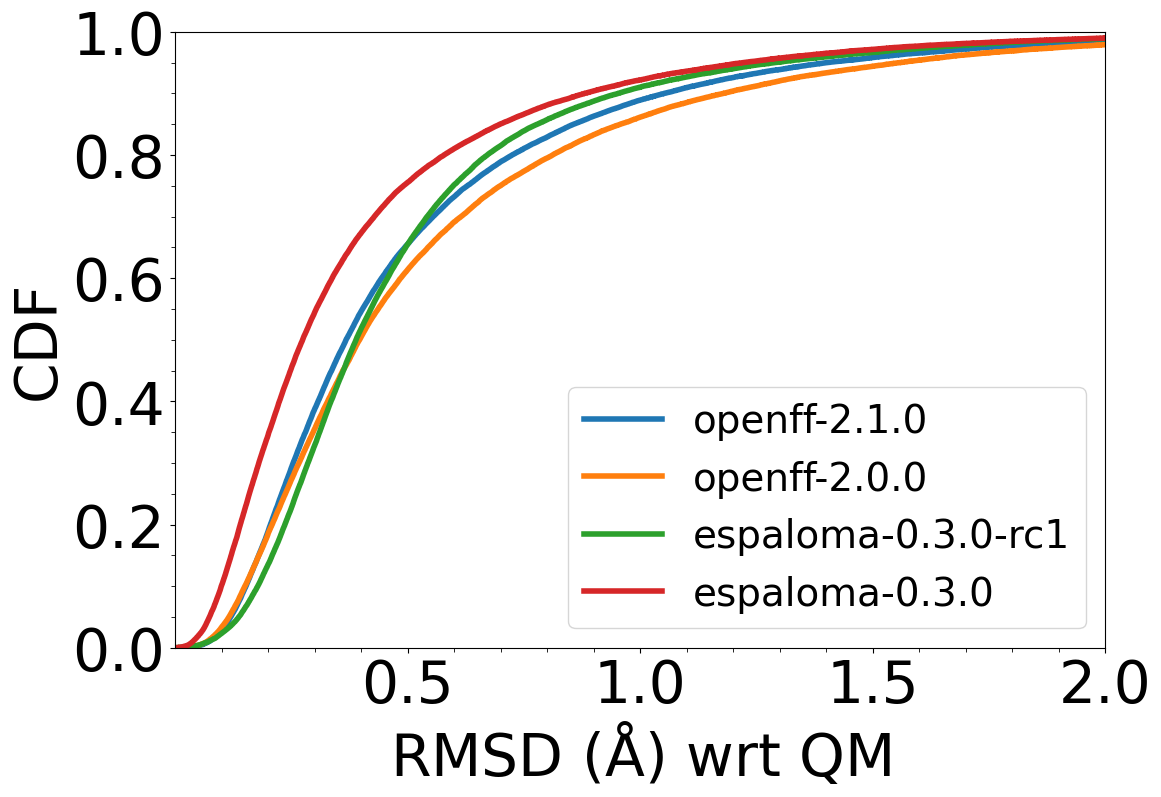

In [9]:
fig, ax = plt.subplots(figsize=(12,8))
plt.rcParams.update({'font.size': 42})

#ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.tick_params(which="minor", axis="both", direction="out", length=3)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

for forcefield in ff_list:
    sns.ecdfplot(df.loc[df['Force Field'] == forcefield]["RMSD"], linewidth=4, label=forcefield)

plt.xlim(0, 2)
plt.xticks(np.arange(0.5, 2.1, 0.5))
plt.yticks(np.arange(0.0, 1.1, 0.2))
plt.xlabel(r"RMSD ($\mathrm{\AA}$) wrt QM")
plt.ylabel("CDF")
plt.legend(loc='lower right', fontsize=28)
#plt.title('RMSD', fontsize=28)
plt.savefig(f'CDF_plot_of_RMSD.png', dpi=300)
plt.savefig(f'CDF_plot_of_RMSD.svg', dpi=2400)
plt.show()

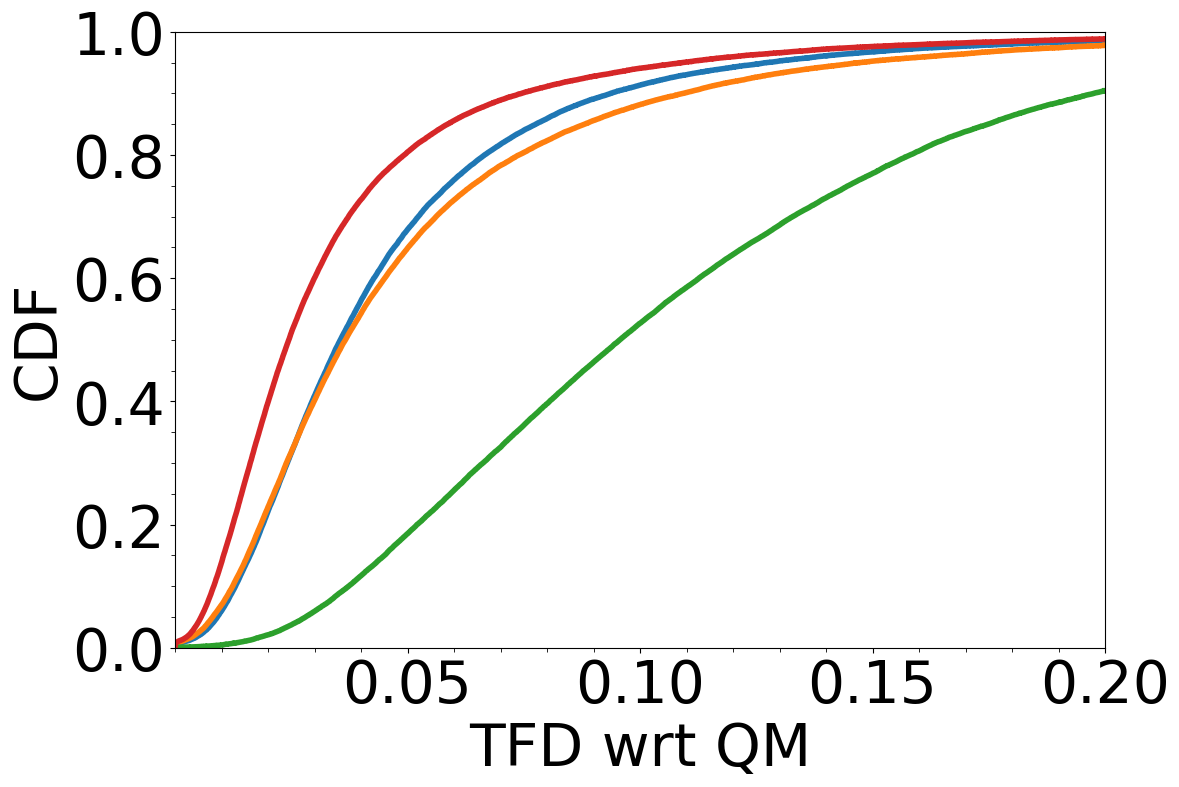

In [10]:
fig, ax = plt.subplots(figsize=(12,8))
plt.rcParams.update({'font.size': 42})

ax.xaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.tick_params(which="minor", axis="both", direction="out", length=3)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

for forcefield in ff_list:
    sns.ecdfplot(df.loc[df['Force Field'] == forcefield]["TFD"], linewidth=4, label=forcefield)

plt.xlim(0, 0.2)
plt.xticks(np.arange(0.05, 0.21, 0.05))
plt.yticks(np.arange(0.0, 1.1, 0.2))
plt.xlabel(f"TFD wrt QM")
plt.ylabel("CDF")
#plt.legend(loc='lower right')
#plt.title('TFD', fontsize=28)
plt.savefig(f'CDF_plot_of_TFD.png', dpi=300)
plt.savefig(f'CDF_plot_of_TFD.svg', dpi=2400)
plt.show()

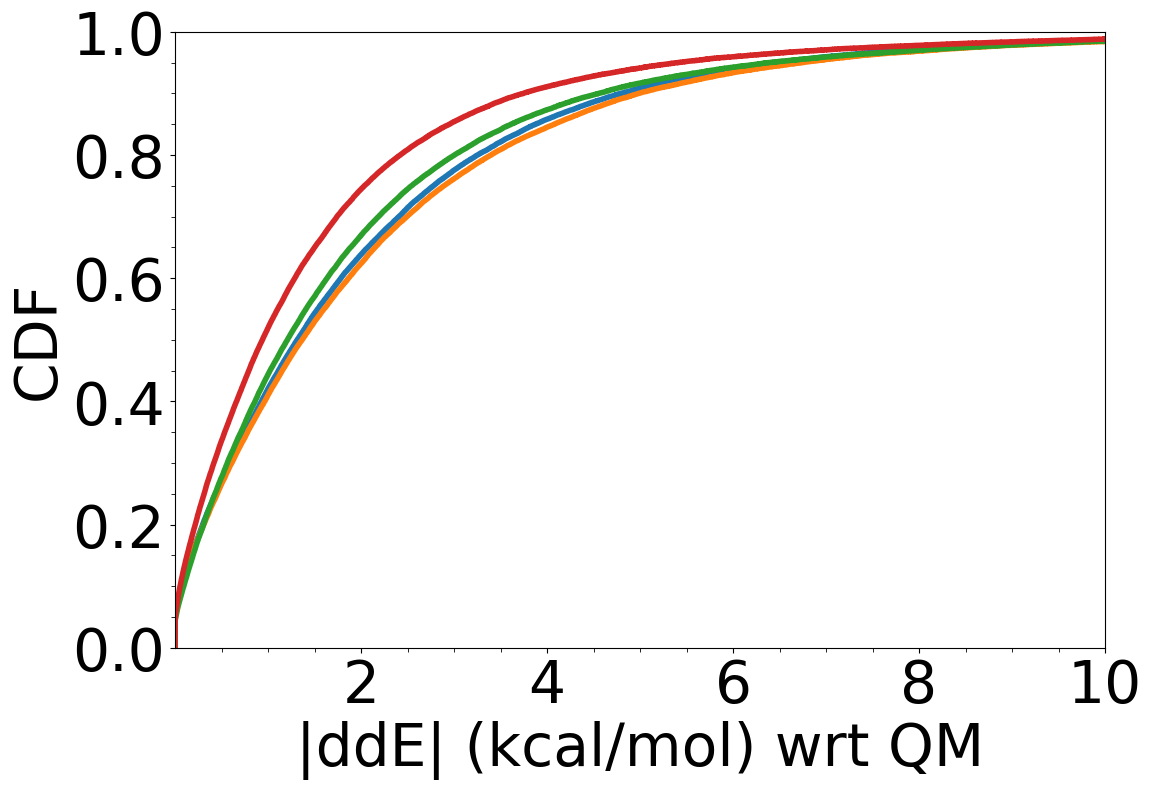

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
plt.rcParams.update({'font.size': 42})

ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
ax.tick_params(which="minor", axis="both", direction="out", length=3)
ax.xaxis.set_minor_locator(AutoMinorLocator())
ax.yaxis.set_minor_locator(AutoMinorLocator())

for forcefield in ff_list:
    sns.ecdfplot(abs(df.loc[df['Force Field'] == forcefield]["ddE"]), linewidth=4, label=forcefield)

plt.xlim(0, 10)
plt.xticks(np.arange(2, 11, 2))
plt.yticks(np.arange(0.0, 1.1, 0.2))
plt.xlabel(f"|ddE| (kcal/mol) wrt QM")
plt.ylabel("CDF")
#plt.legend(loc='lower right')
#plt.title('|ddE|', fontsize=28)
plt.savefig(f'CDF_plot_of_ddE.png', dpi=300)
plt.savefig(f'CDF_plot_of_ddE.svg', dpi=2400)
plt.show()